In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [4]:
# Load the olr and precip data
olr, time_olr, datetimes_olr, con_olr = functions.load_olr_data(dictionaries.data_file)

# Load the precip data
precip, time_precip, datetimes_precip, con_precip = functions.load_precip_data(dictionaries.precip)

In [5]:
# Set up the directory to save the data
savedir, plot_dir = functions.setup_directories()

In [6]:
# Extract longitude and latitude
longitude,latitude=np.meshgrid(olr.coord('longitude').points,olr.coord('latitude').points)

# Calculate dxy
dxy, dt = functions.calculate_dxy(longitude, latitude, olr)

In [7]:
#sigma = dictionaries.sigma

#tf = (olr.data/sigma)**(0.25)
#tb_var = (-dictionaries.a + np.sqrt(dictionaries.a**2 + 4*dictionaries.b*tf.data))/(2*dictionaries.b)

In [8]:
# Calculate brightness temperatures
tf, tb_var, tb = functions.calculate_temperatures(dictionaries.a, dictionaries.b, dictionaries.sigma, olr)

In [9]:
# Set up the parameters dictionaries
# features parameters
parameters_features = functions.setup_parameters_features(dictionaries.position_threshold, dictionaries.sigma_threshold, dictionaries.target, dictionaries.threshold, dictionaries.n_min_threshold)

# segmentation parameters
parameters_segmentation = functions.setup_parameters_segmentation(dictionaries.target, dictionaries.method, dictionaries.threshold)

# linking parameters
parameters_linking = functions.setup_parameters_linking(dictionaries.n_min_threshold, dictionaries.stubs, dictionaries.order, dictionaries.extrapolate, dictionaries.memory, dictionaries.adaptive_stop, dictionaries.adaptive_step, dictionaries.subnetwork_size, dictionaries.method_linking)

In [10]:
# Now perform the sensitivity analysis
print("Values of threshold to be tested: ", dictionaries.threshold_values)
threshold_values=dictionaries.threshold_values

# Call the sensitivity analysis function
functions.perform_sensitivity_analysis(tb, savedir, parameters_features, parameters_segmentation, parameters_linking, threshold_values)

Frame 743: 18 trajectories present.
[13.69267803 12.89277113  9.90781509 12.67956627  5.80390147  8.35729859
 27.83838422  2.31278392 18.48491155 16.52353315 10.28634804  9.44599149
 21.71430878  9.51619108  8.05940394 17.22995195 11.09437322 14.17087185
  3.86956944 11.899843   14.52593348 15.67194387  4.88788274 10.99856496
 14.10838453  7.33979196 13.36236775 11.95332108 13.17126921 22.6162658
 16.72659582 15.23681736 13.51400966 14.0263191  14.64904722  8.27744979
 10.58390521 23.14873398 10.75247215  2.57641659  3.2114882   4.9041471
 21.19758166 11.71543016  6.4251253   8.51467566 11.92078214 10.528347
 15.53240556 19.65949094 17.20759784  4.40663308 13.78912429 10.19471641
 23.03666996 16.22165092  8.63007643 14.64286873 12.73569249 15.12548353
 18.52330591  9.41147751 21.9676778   7.09558759  8.61458352 12.03754264
 35.75929357 16.46686623 17.29567314 12.22237509 17.37980499 18.02452195
 12.34035668 15.33796547 14.24898189 11.68769505 11.84403546  9.67945731
 14.57732535 14.727

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,threshold
0,5527,131019.807317,8.298356e+05,43745.785714,238,10.785714,78.0,6.0,13.410113,39.677324,3.824476,225
1,6963,144911.515439,1.178854e+06,45855.000000,300,11.420000,73.0,6.0,13.092906,32.622529,2.997511,230
2,8130,165777.055626,1.357161e+06,48400.031250,378,10.920635,57.0,6.0,13.556025,35.372745,1.372850,235
3,9120,196724.665977,2.148459e+06,45557.437500,414,10.818841,77.0,6.0,13.861221,47.544487,2.714167,240
4,9291,201450.394663,2.122804e+06,44284.218750,418,10.887560,80.0,6.0,13.531310,38.705875,2.851937,241
5,9652,235241.112687,2.582027e+06,48840.750000,416,10.908654,55.0,6.0,13.797439,42.234882,2.312784,245


In [11]:
df = pd.read_csv('Save/Jan_2000/singleTb/sensitivity_analysis_singleTbThreshold.csv')

In [12]:
df

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,threshold
0,5527,131019.807317,8.298356e+05,43745.785714,238,10.785714,78.0,6.0,13.410113,39.677324,3.824476,225
1,6963,144911.515439,1.178854e+06,45855.000000,300,11.420000,73.0,6.0,13.092906,32.622529,2.997511,230
2,8130,165777.055626,1.357161e+06,48400.031250,378,10.920635,57.0,6.0,13.556025,35.372745,1.372850,235
3,9120,196724.665977,2.148459e+06,45557.437500,414,10.818841,77.0,6.0,13.861221,47.544487,2.714167,240
4,9291,201450.394663,2.122804e+06,44284.218750,418,10.887560,80.0,6.0,13.531310,38.705875,2.851937,241
5,9652,235241.112687,2.582027e+06,48840.750000,416,10.908654,55.0,6.0,13.797439,42.234882,2.312784,245


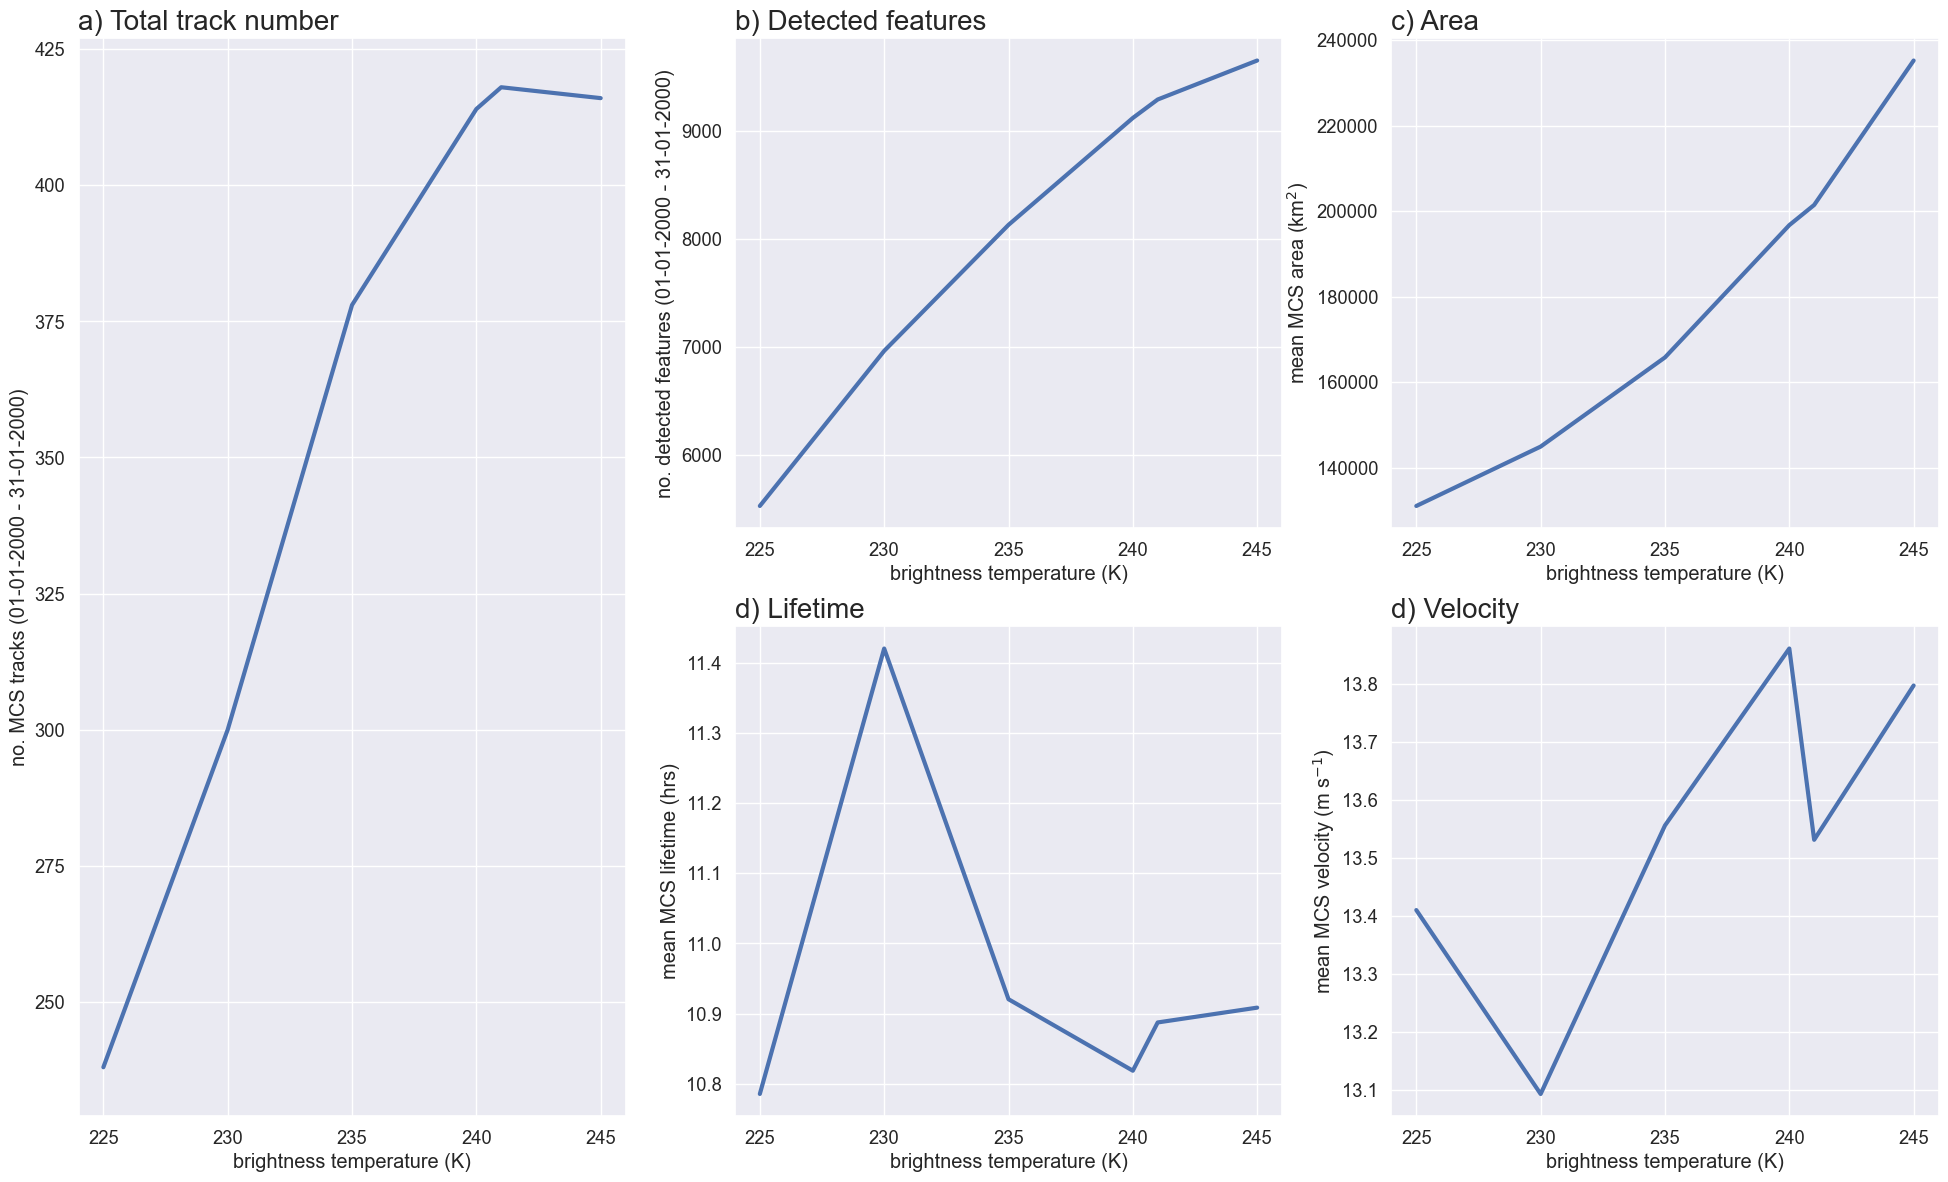

In [13]:
#plot of single Tb sensitivity analysis for MCSs
import seaborn as sns 
sns.set(font_scale=1.2)

plt.figure(figsize=(24,14))
f= 20
lf= 15

xticks=[225,230,235,240,245]
ax1=plt.subplot(2,3,(1,4))
ax1.set_title('a) Total track number ', loc='left', fontsize= f )
ax1.plot(df['threshold'],df['num_tracks'],linewidth=3)
ax1.set_xticks(xticks)
ax1.set_ylabel('no. MCS tracks (01-01-2000 - 31-01-2000)')
ax1.set_xlabel('brightness temperature (K)')

ax2=plt.subplot(2,3,2)
ax2.set_title('b) Detected features ', loc='left', fontsize= f )
ax2.plot(df['threshold'],df['num_features'],linewidth=3)
ax2.set_xticks(xticks)
ax2.set_ylabel('no. detected features (01-01-2000 - 31-01-2000)')
ax2.set_xlabel('brightness temperature (K)')

ax3=plt.subplot(2,3,3)
ax3.set_title('c) Area ', loc='left', fontsize= f )
ax3.plot(df['threshold'],df['mean_area'],linewidth=3)
ax3.set_xticks(xticks)
ax3.set_ylabel('mean MCS area (km$^{2}$)')
ax3.set_xlabel('brightness temperature (K)')

ax4=plt.subplot(2,3,5)
ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
ax4.plot(df['threshold'],df['mean_lifetime'],linewidth=3)
ax4.set_xticks(xticks)
ax4.set_ylabel('mean MCS lifetime (hrs)')
ax4.set_xlabel('brightness temperature (K)')

ax5=plt.subplot(2,3,6)
ax5.set_title('d) Velocity ', loc='left', fontsize= f )
ax5.plot(df['threshold'],df['mean_velocity'],linewidth=3)
ax5.set_xticks(xticks)
ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
ax5.set_xlabel('brightness temperature (K)')

plt.savefig('Plot/Jan_2000/singleTb/single_tb_analysis.png')


In [14]:
# #plot of nminthreshold sensitivity analysis for MCSs
# import seaborn as sns 
# sns.set(font_scale=1.2)

# plt.figure(figsize=(24,14))
# f= 20
# lf= 15

# xticks=[118,987,1481,1975,2469]
# ax1=plt.subplot(2,3,(1,4))
# ax1.set_title('a) Total track number ', loc='left', fontsize= f )
# ax1.plot(df['n_min_threshold'],df['num_tracks'],linewidth=3)
# ax1.set_xticks(xticks)
# ax1.set_ylabel('no. MCS tracks (01-01-2005 - 31-01-2005)')
# ax1.set_xlabel('minimum area threshold (km$^{2}$)')

# ax2=plt.subplot(2,3,2)
# ax2.set_title('b) Detected features ', loc='left', fontsize= f )
# ax2.plot(df['n_min_threshold'],df['num_features'],linewidth=3)
# ax2.set_xticks(xticks)
# ax2.set_ylabel('no. detected features (01-01-2005 - 31-01-2005)')
# ax2.set_xlabel('minimum area threshold (km$^{2}$)')

# ax3=plt.subplot(2,3,3)
# ax3.set_title('c) Area ', loc='left', fontsize= f )
# ax3.plot(df['n_min_threshold'],df['mean_area'],linewidth=3)
# ax3.set_xticks(xticks)
# ax3.set_ylabel('mean MCS area (km$^{2}$)')
# ax3.set_xlabel('minimum area threshold (km$^{2}$)')

# ax4=plt.subplot(2,3,5)
# ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
# ax4.plot(df['n_min_threshold'],df['mean_lifetime'],linewidth=3)
# ax4.set_xticks(xticks)
# ax4.set_ylabel('mean MCS lifetime (hrs)')
# ax4.set_xlabel('minimum area threshold (km$^{2}$)')

# ax5=plt.subplot(2,3,6)
# ax5.set_title('d) Velocity ', loc='left', fontsize= f )
# ax5.plot(df['n_min_threshold'],df['mean_velocity'],linewidth=3)
# ax5.set_xticks(xticks)
# ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
# ax5.set_xlabel('minimum area threshold (km$^{2}$)')

# plt.savefig('Plot/Jan_2005/nminthreshold/nminthreshold_analysis.png')
